In [2]:
import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

## Load the data

In [3]:
in_file = "../data/imu_stat_y_gon.txt"
imu_data = utilities.get_data(in_file)

In [4]:
def load_data(imu_data):
    stamp = imu_data.loc[:,'secs'].values + imu_data.loc[:,'nsecs'].values/1E9
    omega = imu_data.loc[:,['angular_velocity_x','angular_velocity_y','angular_velocity_z']].values
    acc_mes = imu_data.loc[:,['linear_acceleration_x','linear_acceleration_y','linear_acceleration_z']].values
    dt = stamp[1:] - stamp[:-1]
    dt = np.append(dt, dt[-1])
    tseq = np.arange(len(stamp))*dt.mean()
    q_mes = imu_data.loc[:,['orientation_w','orientation_x','orientation_y','orientation_z']].values
    print("Length of the sequence: %s"%len(imu_data))
    return tseq, dt, q_mes, acc_mes, omega

tseq, dt, q_mes, acc_mes, omega = load_data(imu_data)

Length of the sequence: 12403


## Plot function

In [5]:
def plot_2D_2(tseq, xyz1, xyz2, ylabel=['x','y','z'], label=['',''],title=''):
    x1 = xyz1[:, 0]
    y1 = xyz1[:, 1]
    z1 = xyz1[:, 2]
    x2 = xyz2[:, 0]
    y2 = xyz2[:, 1]
    z2 = xyz2[:, 2]
    plt.figure()
    ax1 = plt.subplot(313)
    plt.plot(tseq, x1)
    plt.plot(tseq, x2)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel[0])
    ax2 = plt.subplot(312,sharex=ax1)
    plt.plot(tseq, y1)
    plt.plot(tseq, y2)
    plt.ylabel(ylabel[1])
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax3 = plt.subplot(311,sharex=ax1)
    plt.plot(tseq, z1, label=label[0])
    plt.plot(tseq, z2, label=label[1])
    plt.ylabel(ylabel[2])
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.title(title)
    if label[0] and label[1]:
        plt.legend()
    
def plot_3D(xyz: np.array):
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]

    # Plot 3D Trajectory
    fig3, ax = plt.subplots(figsize=(9, 8))
    fig3.suptitle('3D Trajectory', fontsize=20)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, c='red', lw=5, label='trajectory')
    ax.set_xlabel('X position (m)')
    ax.set_ylabel('Y position (m)')
    ax.set_zlabel('Z position (m)')
    ax.set_xlim(x.min()-1, x.max()+1)
    ax.set_ylim(y.min()-1, y.max()+1)
    ax.set_zlim(z.min()-1, z.max()+1)

def plot_3D_2(xyz1, xyz2, subtitles=['', '']):
    # Plot 3D Trajectory
    fig3 = plt.figure(figsize=(15, 8))
    fig3.suptitle('3D Trajectory', fontsize=20)

    layout = 121
    for xyz, title in zip((xyz1, xyz2), subtitles):
        if not isinstance(xyz, np.ndarray):
            xyz = np.array(xyz)
        x = xyz[:, 0]
        y = xyz[:, 1]
        z = xyz[:, 2]
        ax = fig3.add_subplot(layout, projection='3d')
        layout += 1

        ax.set_title(title)
        ax.plot3D(x, y, z, c='red', lw=2, label='')
        ax.set_xlabel('X position (m)')
        ax.set_ylabel('Y position (m)')
        ax.set_zlabel('Z position (m)')
        ax.set_xlim(x.min()-1, x.max()+1)
        ax.set_ylim(y.min()-1, y.max()+1)
        ax.set_zlim(z.min()-1, z.max()+1)

## Calculate the quaternion

In [6]:
q_mahony = utilities.calc_orient(q_ref=q_mes[0], omega=omega, dt=dt, method='Mahony',acc=acc_mes)
q = utilities.calc_orient(q_ref=q_mes[0], omega=omega, dt=dt)
ypr_mahony = utilities.quat2seq(q_mahony[:-1])
ypr = utilities.quat2seq(q[:-1])
ypr_mes = utilities.quat2seq(q_mes)

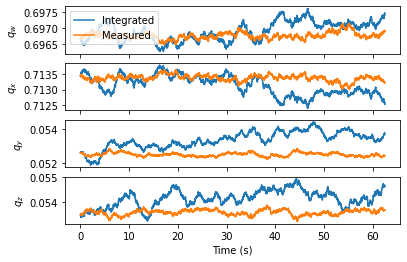

In [7]:
# compare the calculated results with the measured results given by IMU
plt.figure()
ax1 = plt.subplot(414)
plt.plot(tseq, q[:-1,3])
plt.plot(tseq, q_mes[:,3])
plt.xlabel("Time (s)")
plt.ylabel(r"$q_z$")
ax2 = plt.subplot(413,sharex=ax1)
plt.plot(tseq, q[:-1,2])
plt.plot(tseq, q_mes[:,2])
plt.ylabel(r"$q_y$")
plt.setp(ax2.get_xticklabels(), visible=False)
ax3 = plt.subplot(412,sharex=ax1)
plt.plot(tseq, q[:-1,1])
plt.plot(tseq, q_mes[:,1])
#plt.plot(tseq, q_corr[:-1,1])
plt.ylabel(r"$q_x$")
plt.setp(ax3.get_xticklabels(), visible=False)
ax4 = plt.subplot(411,sharex=ax1)
plt.plot(tseq, q[:-1,0], label="Integrated")
plt.plot(tseq, q_mes[:,0], label='Measured')
#plt.plot(tseq, q_corr[:-1,0],label='Corrected')
plt.ylabel(r"$q_w$")
plt.setp(ax4.get_xticklabels(), visible=False)
plt.legend()

### Compare with Mahony and Madgwick method

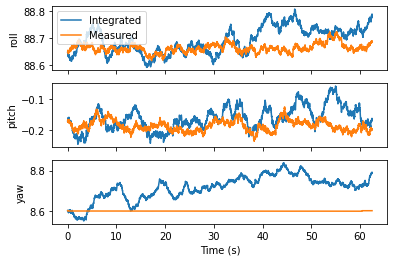

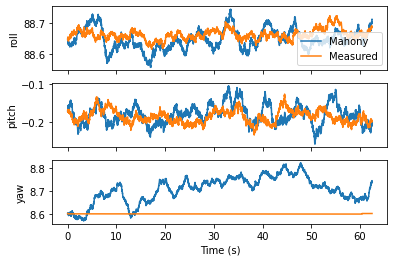

In [8]:
plot_2D_2(tseq, ypr, ypr_mes, label=['Integrated', 'Measured'], ylabel=['yaw','pitch','roll'])
plot_2D_2(tseq, ypr_mahony, ypr_mes, label=['Mahony', 'Measured'], ylabel=['yaw','pitch','roll'])

In [9]:
in_file = "data_CH110/data_20210625_141437.csv"
imu_data_ch = pd.read_csv(in_file)
stamp_ch = imu_data_ch.loc[:, ['TimeStamp']].values/1E3
dt_ch = stamp_ch[1:] - stamp_ch[:-1]
dt_ch = np.append(dt_ch, dt_ch[-1])
omega_ch = imu_data_ch.loc[:,['GyrX','GyrY','GyrZ']].values/180.*np.pi
acc_mes_ch = imu_data_ch.loc[:,['AccX','AccY','AccZ']].values*9.7949
q_mes_ch = imu_data_ch.loc[:,['Qw','Qx','Qy','Qz']].values
mag_ch = imu_data_ch.loc[:,['MagX','MagY','MagZ']].values/180.*np.pi
tseq_ch = np.arange(len(omega_ch))*dt_ch.mean()

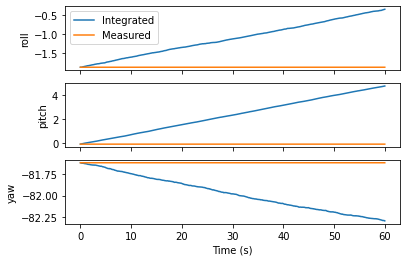

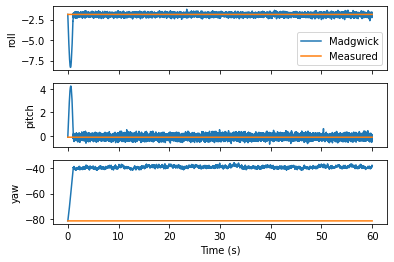

In [10]:
q_ch = utilities.calc_orient(q_ref=q_mes_ch[0],omega=omega_ch, dt=dt_ch,
                            )
q_ch = q_ch[:-1]
ypr_ch = utilities.quat2seq(q_ch)
ypr_mes_ch = utilities.quat2seq(q_mes_ch)
plot_2D_2(tseq_ch, ypr_ch, ypr_mes_ch, label=['Integrated', 'Measured'], ylabel=['yaw','pitch','roll'])

q_ch = utilities.calc_orient(q_ref=q_mes_ch[0],omega=omega_ch, dt=dt_ch,
                             method='Madgwick',acc=acc_mes_ch,mag=mag_ch,
                             nav='ENU',
                            )
q_ch = q_ch[:-1]
ypr_ch = utilities.quat2seq(q_ch)
ypr_mes_ch = utilities.quat2seq(q_mes_ch)
plot_2D_2(tseq_ch, ypr_ch, ypr_mes_ch, label=['Madgwick', 'Measured'], ylabel=['yaw','pitch','roll'])

## Calculate the position and velocity

In [11]:
pos, vel, acc_space = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, gravity_off=False)

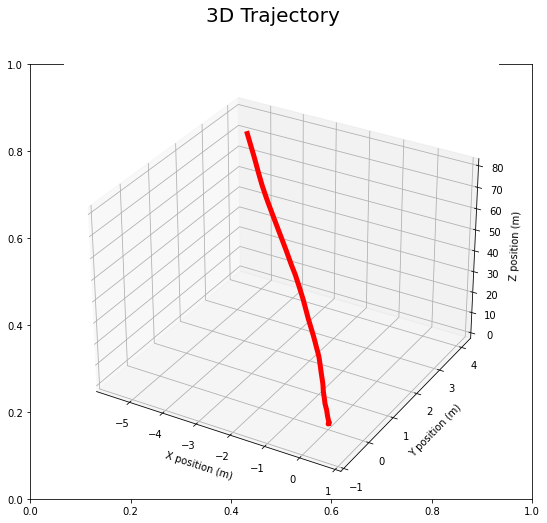

In [12]:
plot_3D(pos)

## Calibrate the accelerometer by ourselves 

In [13]:
pos_calib, vel_calib, acc_space_calib = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, calibrate_acc=True, gravity_off=False)

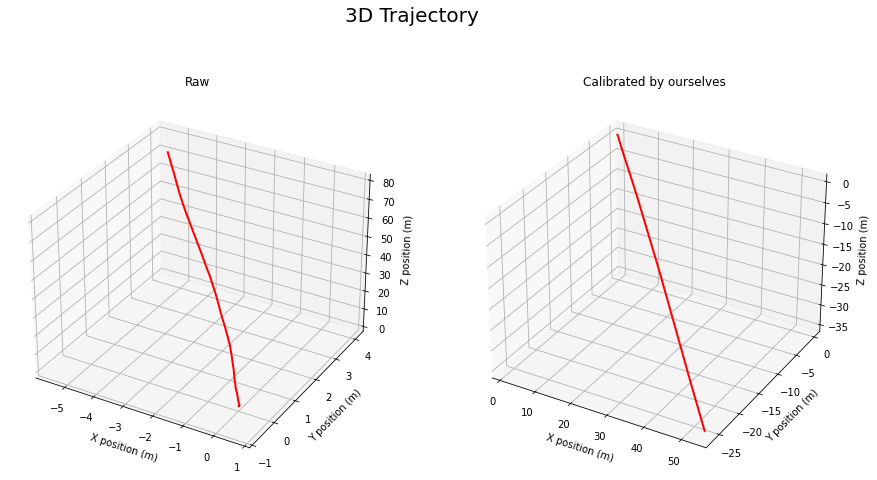

In [14]:
plot_3D_2(pos, pos_calib, subtitles=['Raw', 'Calibrated by ourselves'])

## Check static moments and correct the bias of accelerometer

In [15]:
pos_bias, vel_bias, acc_space_bias = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, bias=True, gravity_off=False)

Acc Bias:  [-0.00233253  0.04060831 -0.00316947]


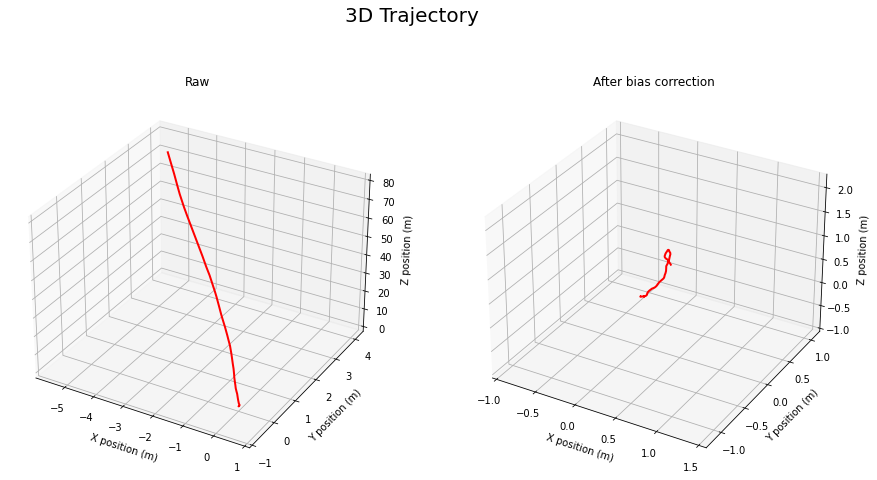

In [16]:
plot_3D_2(pos, pos_bias, subtitles=['Raw', 'After bias correction'])

## Set some threshold to acceleration

In [17]:
# set threshold to 0.01 which means all acc<0.01 m/s^2 will be ignored
pos_thres1, vel_thres1, acc_space_thres1 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, threshold=0.01, gravity_off=False)
# set threshold to 0.05
pos_thres2, vel_thres2, acc_space_thres2 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, threshold=0.05, gravity_off=False)
# set threshold to 0.08
pos_thres3, vel_thres2, acc_space_thres3 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, threshold=0.08, gravity_off=False)

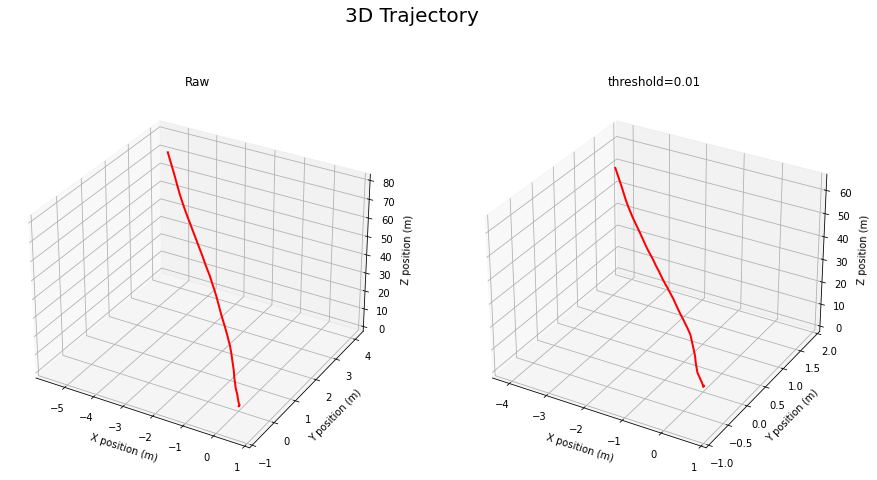

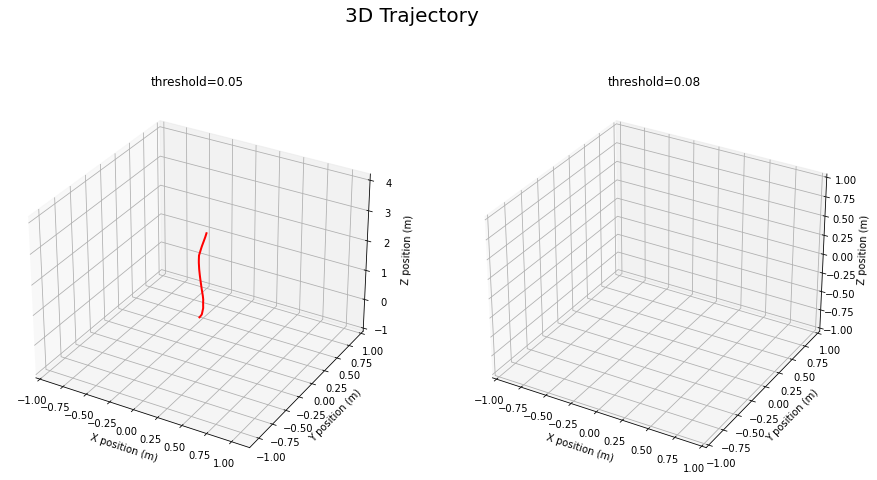

In [18]:
plot_3D_2(pos, pos_thres1, subtitles=['Raw', 'threshold=0.01'])
plot_3D_2(pos_thres2, pos_thres3, subtitles=['threshold=0.05', 'threshold=0.08'])

## Add IIR filter (Butterworth)

### high-pass filter

In [19]:
# adopt butterworth high pass filter, set cut-off frequencies to 0.05, 0.10 and 0.20 Hz
pos_highpass1, vel_highpass1, acc_space_highpass1 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, high_pass=0.05, gravity_off=False)
pos_highpass2, vel_highpass2, acc_space_highpass2 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, high_pass=0.10, gravity_off=False)
pos_highpass3, vel_highpass3, acc_space_highpass3 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, high_pass=0.20, gravity_off=False)

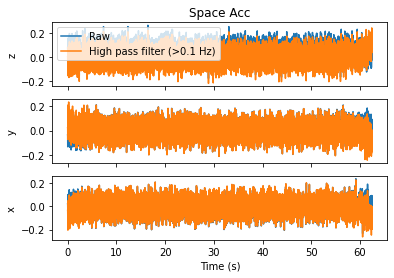

In [20]:
plot_2D_2(tseq, acc_space, acc_space_highpass2, label=['Raw', 'High pass filter (>0.1 Hz)'], title='Space Acc')

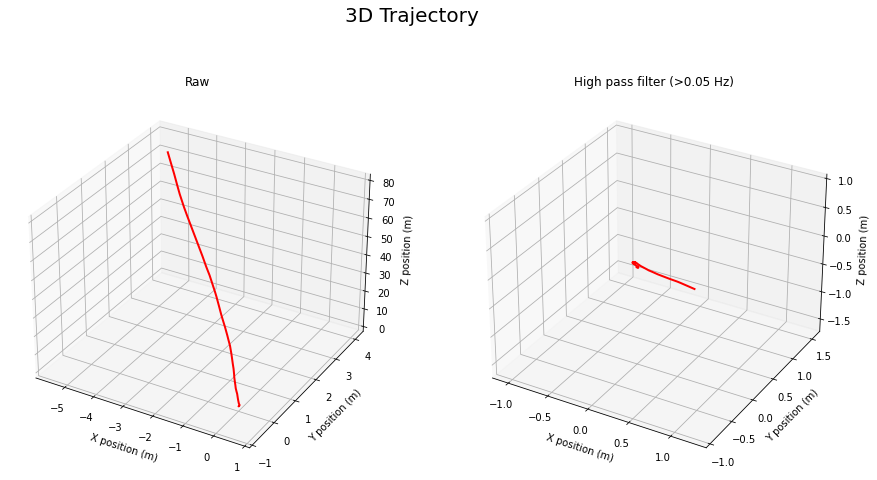

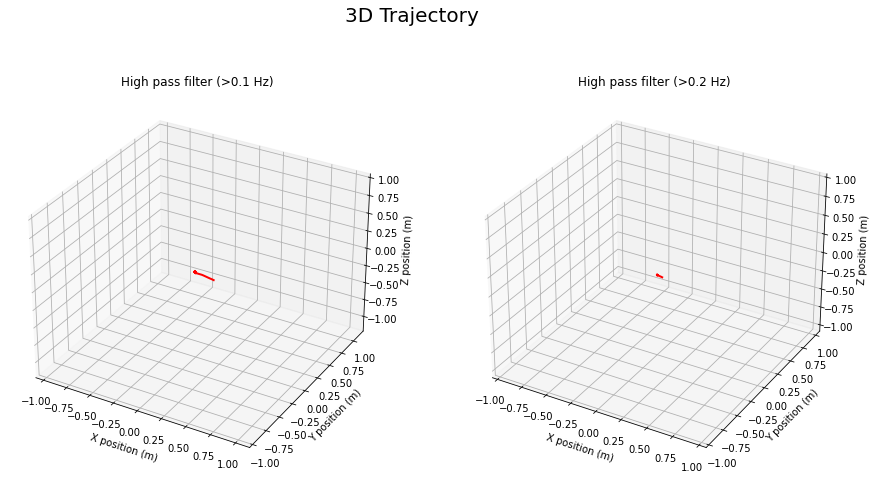

In [21]:
plot_3D_2(pos, pos_highpass1, subtitles=['Raw', 'High pass filter (>0.05 Hz)'])
plot_3D_2(pos_highpass2, pos_highpass3, subtitles=['High pass filter (>0.1 Hz)', 'High pass filter (>0.2 Hz)'])

### low pass filter

In [22]:
pos_lowpass1, vel_lowpass1, acc_space_lowpass1 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, low_pass=1, gravity_off=False)
pos_lowpass2, vel_lowpass2, acc_space_lowpass2 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, low_pass=5, gravity_off=False)
pos_lowpass3, vel_lowpass3, acc_space_lowpass3 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, low_pass=10, gravity_off=False)

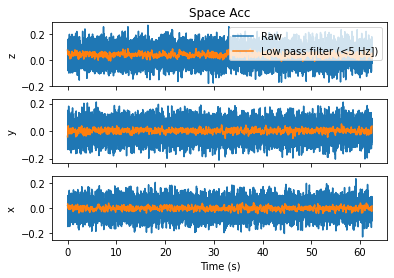

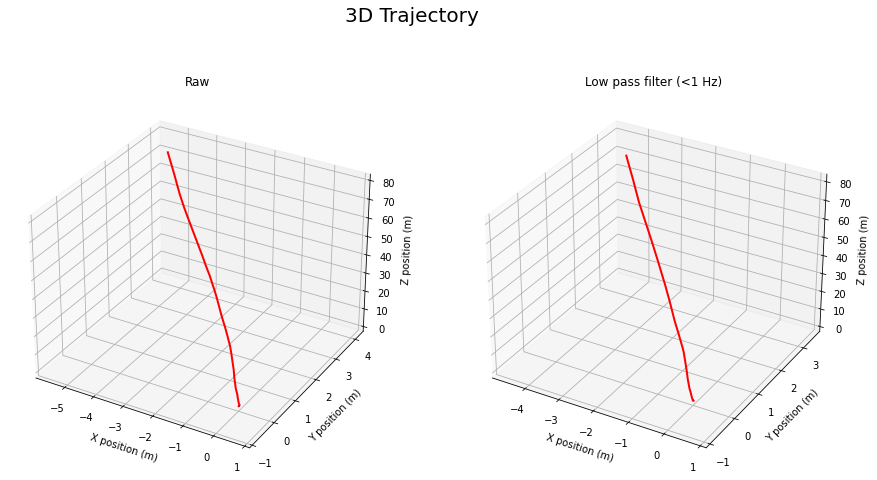

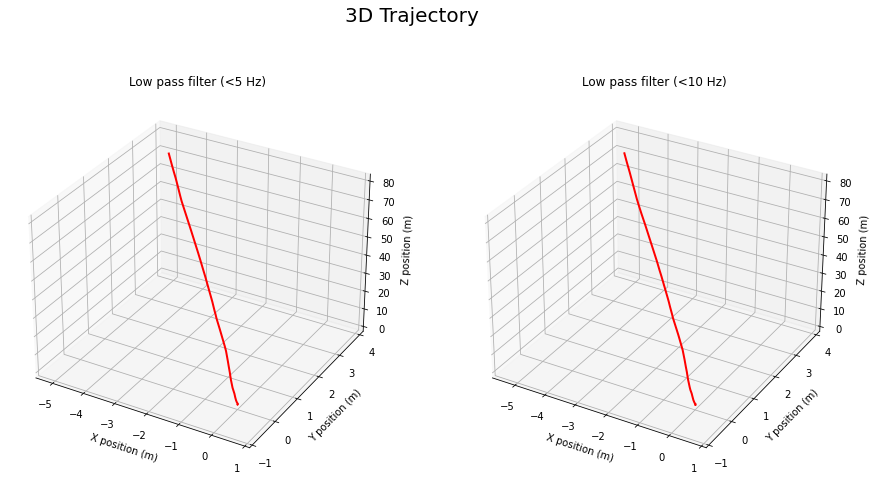

In [23]:
plot_2D_2(tseq, acc_space, acc_space_lowpass2, label=['Raw', 'Low pass filter (<5 Hz])'], title='Space Acc')
plot_3D_2(pos, pos_lowpass1, subtitles=['Raw', 'Low pass filter (<1 Hz)'])
plot_3D_2(pos_lowpass2, pos_lowpass3, subtitles=['Low pass filter (<5 Hz)', 'Low pass filter (<10 Hz)'])

## An example of moving indoor

In [24]:
in_file = '../data_csv/imu_indoor.csv'
imu_data = pd.read_csv(in_file)
tseq, dt, q_mes, acc_mes, omega = load_data(imu_data)

Length of the sequence: 20281


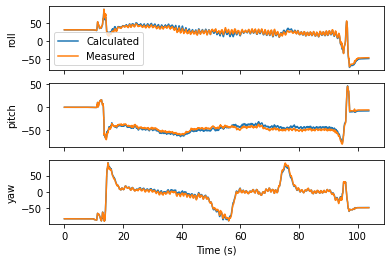

In [25]:
q = utilities.calc_orient(q_ref=q_mes[0], omega=omega, dt=dt)
ypr = utilities.quat2seq(q[:-1])
ypr_mes = utilities.quat2seq(q_mes)
plot_2D_2(tseq, ypr, ypr_mes, label=['Calculated', 'Measured'], ylabel=['yaw','pitch','roll'])

In [26]:
pos_id0, vel_id0, acc_space_id0 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, gravity_off=False)
pos_id, vel_id, acc_space_id = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt,threshold=0.5, high_pass=0.01, low_pass=5, gravity_off=False)

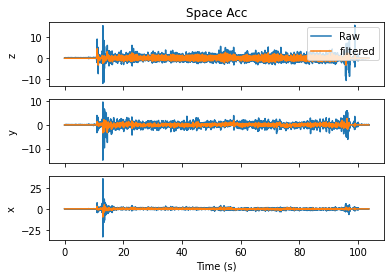

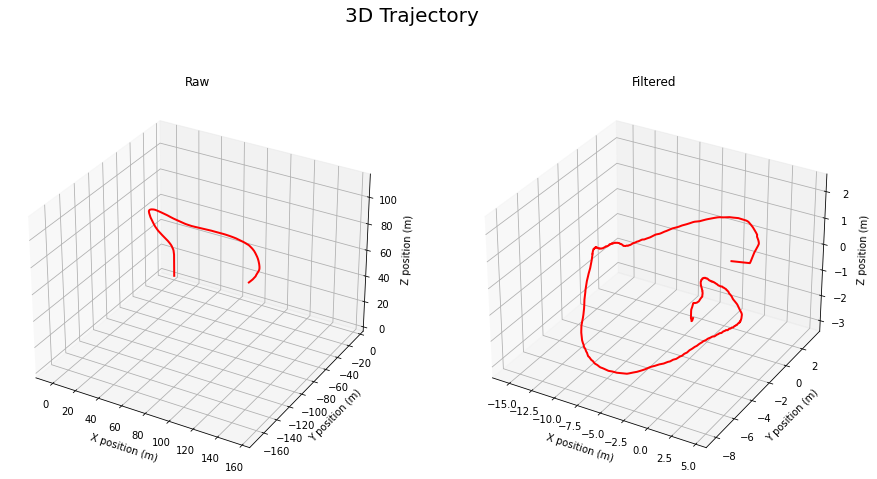

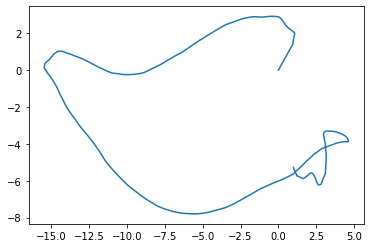

In [27]:
plot_2D_2(tseq,acc_space_id0,acc_space_id, label=['Raw', 'filtered'],title='Space Acc')
plot_3D_2(pos_id0, pos_id, subtitles=['Raw', 'Filtered'])
plt.figure()
plt.plot(pos_id[:,0],pos_id[:,1])

(-1.0, 10.0)

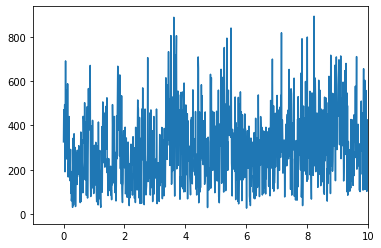

In [28]:
famp_acc = np.abs(np.fft.fft(acc_space_id0[:,1]))
freq = np.arange(len(famp_acc))/len(famp_acc)/dt.mean()
plt.plot(freq,famp_acc)
plt.xlim(-1,10)

## An example from rosbag

In [29]:
in_file = '../data_csv/utbm_robocar_dataset_20180502_noimage2.csv'
imu_data = pd.read_csv(in_file)
tseq, dt, q_mes, acc_mes, omega = load_data(imu_data)

Length of the sequence: 83513


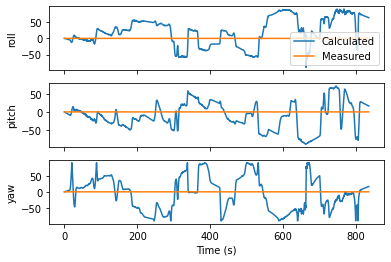

In [30]:
q = utilities.calc_orient(omega=omega, dt=dt)
q = q[:-1]
ypr = utilities.quat2seq(q)
ypr_mes = utilities.quat2seq(q_mes)
plot_2D_2(tseq, ypr, ypr_mes, label=['Calculated', 'Measured'], ylabel=['yaw','pitch','roll'])

In [31]:
pos_id0, vel_id0, acc_space_id0 = utilities.calc_posvel(q, acc_measured=acc_mes, dt=dt, gravity_off=False)
pos_id, vel_id, acc_space_id = utilities.calc_posvel(q, acc_measured=acc_mes, dt=dt,threshold=1, high_pass=0.002, low_pass=5, gravity_off=False)
print(dt.mean())

0.009999400079439471


Text(0, 0.5, 'y (m)')

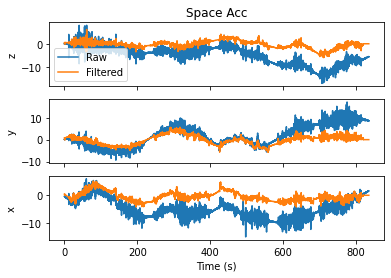

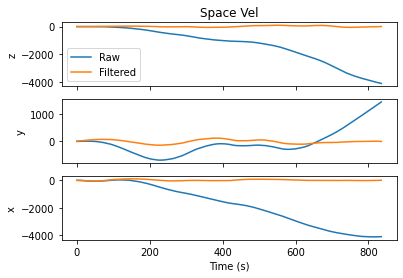

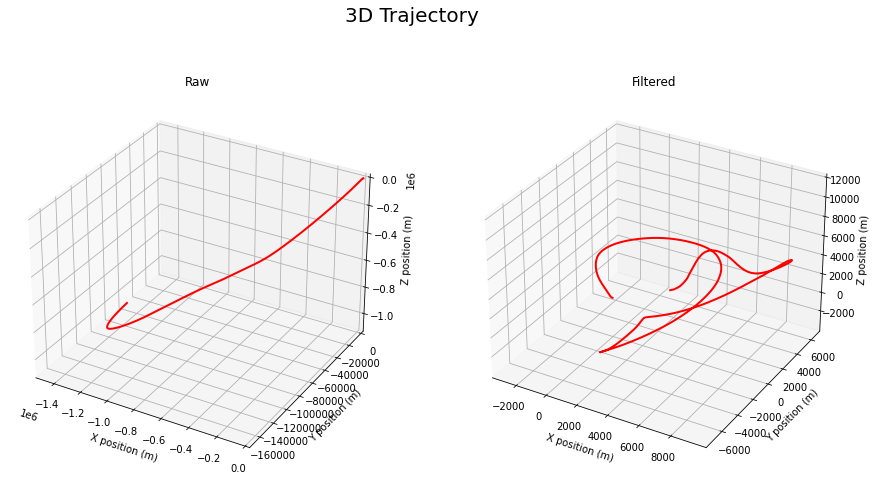

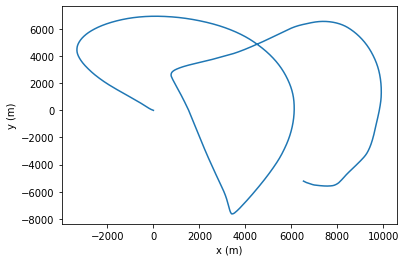

In [32]:
plot_2D_2(tseq,acc_space_id0,acc_space_id, label=['Raw', 'Filtered'],title='Space Acc')
plot_2D_2(tseq,vel_id0,vel_id, label=['Raw', 'Filtered'],title='Space Vel')
plot_3D_2(pos_id0, pos_id, subtitles=['Raw', 'Filtered'])
plt.figure()
plt.plot(pos_id[:,0],pos_id[:,1])
plt.xlabel("x (m)")
plt.ylabel("y (m)")

## Our data 1

In [33]:
in_file = '../data_csv/2021-07-02-14-22-04.csv'
imu_data = pd.read_csv(in_file)
tseq, dt, q_mes, acc_mes, omega = load_data(imu_data)

Length of the sequence: 104543


/Users/leizhou/Documents/AQRONOS/IMU/imu/utilities.py:154: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(R_yx / np.cos(phi))


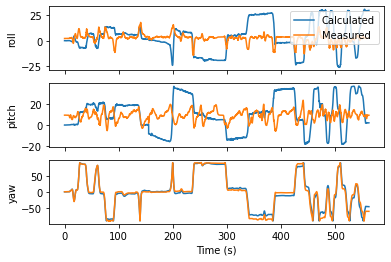

In [34]:
q = utilities.calc_orient(omega=omega, dt=dt)
q = q[:-1]
ypr = utilities.quat2seq(q)
ypr_mes = utilities.quat2seq(q_mes)
plot_2D_2(tseq, ypr, ypr_mes, label=['Calculated', 'Measured'], ylabel=['yaw','pitch','roll'])

In [35]:
pos_id0, vel_id0, acc_space_id0 = utilities.calc_posvel(q, acc_measured=acc_mes, dt=dt, gravity_off=False)
pos_id, vel_id, acc_space_id = utilities.calc_posvel(q, acc_measured=acc_mes, dt=dt,threshold=1, high_pass=0.002, low_pass=5, gravity_off=False)

Text(0, 0.5, 'y (m)')

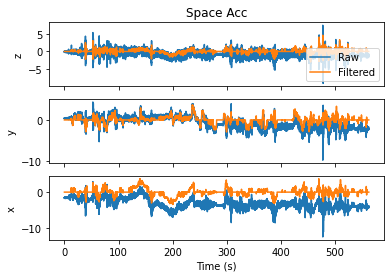

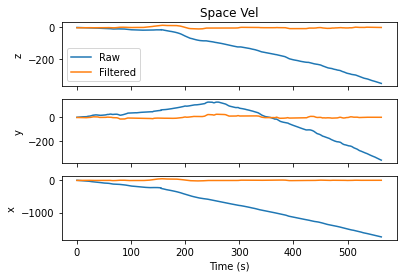

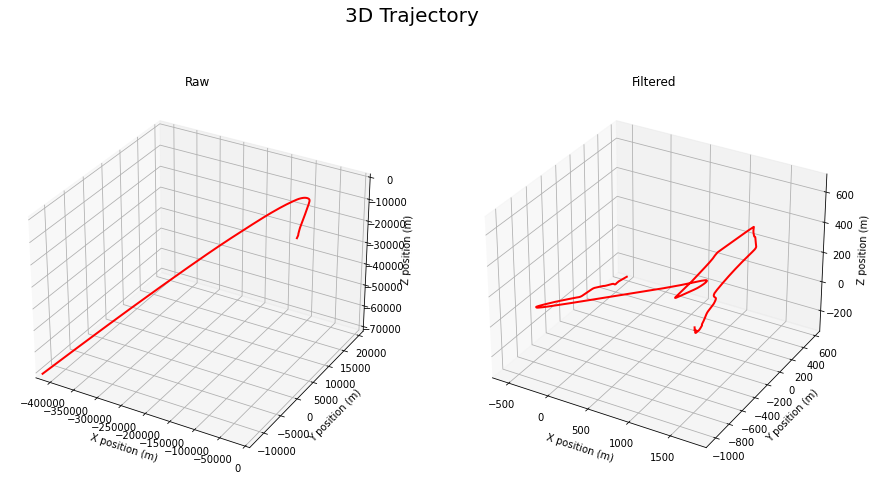

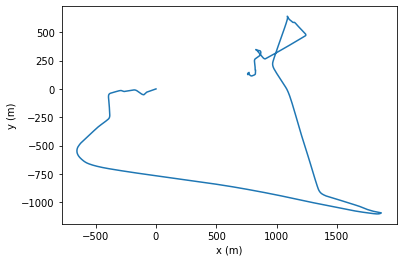

In [36]:
plot_2D_2(tseq,acc_space_id0,acc_space_id, label=['Raw', 'Filtered'],title='Space Acc')
plot_2D_2(tseq,vel_id0,vel_id, label=['Raw', 'Filtered'],title='Space Vel')
plot_3D_2(pos_id0, pos_id, subtitles=['Raw', 'Filtered'])
plt.figure()
plt.plot(pos_id[:,0],pos_id[:,1])
plt.xlabel("x (m)")
plt.ylabel("y (m)")

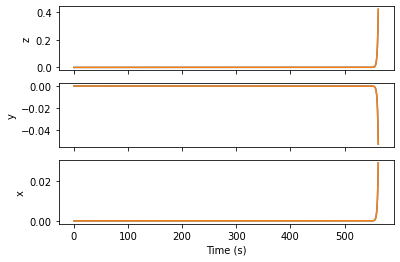

In [37]:
from scipy import signal
bh,ah=signal.butter(1, 0.1*2*dt.mean(), 'highpass')
bl,al=signal.butter(1, 0.1*2*dt.mean(), 'lowpass')
acc_space_h = signal.filtfilt(bh, ah, acc_space_id0.T).T
acc_space_l = signal.filtfilt(bl, al, acc_space_id0.T).T
plot_2D_2(tseq, acc_space_h-(acc_space_id0-acc_space_l),acc_space_h-(acc_space_id0-acc_space_l))

In [38]:
ls ../data_csv/

2021-07-02-14-22-04.csv
2021-07-05-15-44-44.csv
caldata.csv
imu_indoor.csv
imu_stat_x_goff.csv
imu_stat_x_gon.csv
imu_stat_y_goff.csv
imu_stat_y_gon.csv
imu_stat_z_goff.csv
imu_stat_z_gon.csv
utbm_robocar_dataset_20180502_noimage2.csv


## Our data 2

In [39]:
in_file = '../data_csv/2021-07-05-15-44-44.csv'
imu_data = pd.read_csv(in_file)
tseq, dt, q_mes, acc_mes, omega = load_data(imu_data)

Length of the sequence: 55750


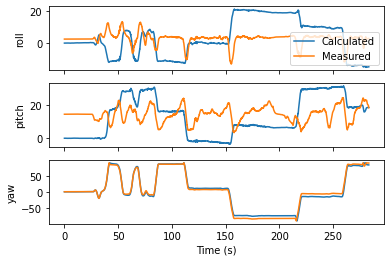

In [40]:
q = utilities.calc_orient(omega=omega, dt=dt)
q = q[:-1]
ypr = utilities.quat2seq(q)
ypr_mes = utilities.quat2seq(q_mes)
plot_2D_2(tseq, ypr, ypr_mes, label=['Calculated', 'Measured'], ylabel=['yaw','pitch','roll'])

In [41]:
pos_id0, vel_id0, acc_space_id0 = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt, gravity_off=False)
pos_id, vel_id, acc_space_id = utilities.calc_posvel(q_mes, acc_measured=acc_mes, dt=dt,threshold=1, high_pass=0.002, low_pass=5, gravity_off=False)

Text(0, 0.5, 'y (m)')

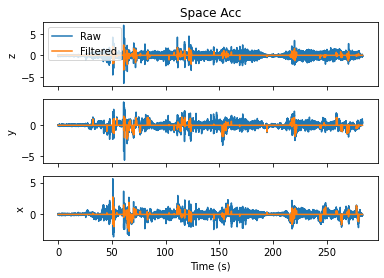

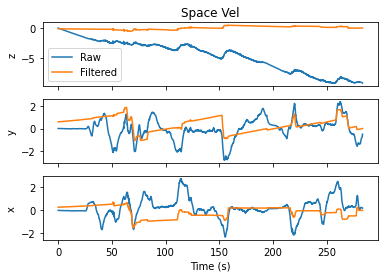

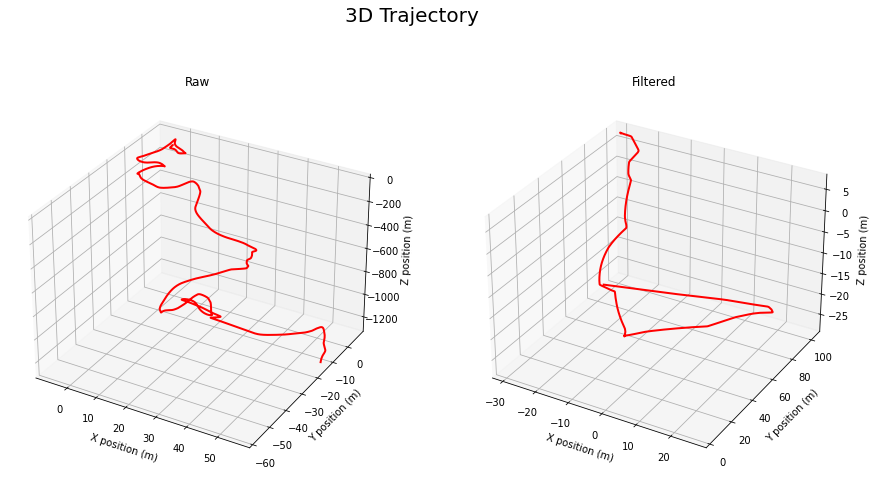

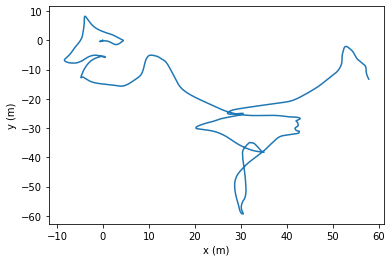

In [43]:
plot_2D_2(tseq,acc_space_id0,acc_space_id, label=['Raw', 'Filtered'],title='Space Acc')
plot_2D_2(tseq,vel_id0,vel_id, label=['Raw', 'Filtered'],title='Space Vel')
plot_3D_2(pos_id0, pos_id, subtitles=['Raw', 'Filtered'])
plt.figure()
plt.plot(pos_id0[:,0],pos_id0[:,1])
plt.xlabel("x (m)")
plt.ylabel("y (m)")